# Machine Learning 1 Final Exam
## Part 1: Hands-On (100 points)
04 Sept 2021


<div>
    <b>General Instructions </b>
    <ol>
        <li>Read each paragraph and instructions <i>carefully</i>.</li>
        <li>Fill in the <b>None</b> or <b>X</b> as required by the problem.</li>
        <li>For coding block exercises, place your code in the space provided, being <i>mindful</i> in the indentation of your code.</li>
        <li>Open Everything but cite your sources if you will be using someone else ideas. </li>
        <li>You cannot in anyway communicate with your classmates. Cheating is punishable by expulsion.</li>
        


<i>Note: This notebook is accompanied by the datasets required by each problem.</i>
</div>

## Part 1. The Spider Web: Classification Problem (50 pts)

Spider webs are an engineering marvel as the silk used to create them has a tensile strength 6 times stronger than steel. Spider webs have overlapping optimization purposes, the foremost of which is to catch suitable prey and withstand environmental perturbations (e.g., wind).  Through constant trial and error, over thousands of years, spiders have evolved how to make effective and robust webs. In this problem, your goal is to understand the features predictive of the spider web shape. The data source will be identified after the exam. I guarantee you cannot find it on the web, so don't waste your time looking for it.

<img src="Spiderwebtype.png">

The **data dictionary** is as follows:

1. `Silk Density`: 0.5 to 2 g/cm3
2. `Maximum Breaking Stress ` : 285 to 1850 MPa
3. `Spider Mass` : 0.05 to 170 g 
4. `Spider Body Length`: .02 to 3.5 inches	
5. `Mass per Length`: Ratio of spider mass and spider body length.
6. `Silk Diameter`: 0.2 to 1 mm	
7. `Natural Habitat`: Indoor or Outdoor
8. `Color of Spider`:black, brown, or grey
9. `Life Span`: 0.5 to 20 years
10. `Poison Level`: Very Poisonous, moderately posionous, or non-poisonous
11. `Humidity of Natural Habitat` : 30% to 70%
12. `Temperature of Natural Habitat` : -5 to 30 Celsius
13. `Type of Spider Web`: "1" Orb-like web,  "0" Cob-like web.

Here are some resources that can help you understand quickly spiders and spider webs:

1. https://en.wikipedia.org/wiki/Spider_web
2. https://en.wikipedia.org/wiki/Spider_silk


## Your tasks (50 pts):

1. Exploratory Data Analysis.    
    A. Display the bar graph and compute the proportional chance criterion (2 pts).   
    B. Display the Scatterplot of the type of spider web using the non-categorical variables(2 pts).
    
2. Implement Machine Learning method using kNN, Logistic Regression (L1 and L2 regularized), Support Vector Machine (L1 and L2 regularized), Random Forest and Gradient Boosting method. Fill-up the table below (21 pts):

|Machine Learning Method| Test Accuracy | Best Parameter | Top Predictor Variable
| :---: | :---: | :----: |:---:|
| kNN | X% | X| X
| Logistic Regression (L2) | X% |X| X
| Logistic Regression (L1) | X% |X| X
| Support Vector Machine (L2) |X% | X | X    
| Support Vector Machine (L1) |X% | X | X  
| Random Forest |X% | X | X    
| Gradient Boosting Method |X% | X | X  

Grading will be based on 1) the accuracy achieved, and 2) completeness of implementation. 


3. Do whatever is necessary to improve the accuracy of your model (Pre-processing of data, feature engineering, grid-search). Interpret your results. If you can develop an accurate formula on how spider web is formed, you will get a perfect score. (15 pts)

4. A company designing a skyscraper, owned by Mr. Peter Wayne, is looking for a nature-inspired model to highlight his towering buildings. You have been invited to pitch in an idea based on spider webs. Make a one-page write-up based on your results (in pdf format) with the goal of getting his attention. (10 pts)


### Recap: Documents for Submission

A. Jupyter notebook containing solution to items 1 to 3.

B. One page pdf for item 4.




In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df_spiderweb = pd.read_excel('Spider Data ML1 Final Exam.xlsx')

In [4]:
df_spiderweb.head()

,Silk Density,Maximum Breaking Stress,Spider Mass,Spider body Length,Mass perLength,Silk Diameter,Indoor or Outdoor,Color of Spider,Life Span,Poison level,Humidity of Habitat,Temperature of Habitat,Type of Spider Web
0,0.561,1461,81,3,27.0,0.834,outdoor,brown,1.09,moderately poisonous,61,27,1
1,1.995,1437,53,2,26.5,0.659,outdoor,black,0.50,very poisonous,44,30,1
2,1.677,1501,54,2,27.0,0.335,outdoor,gray,1.45,non-poisonous,49,1,1
3,1.161,1622,87,3,29.0,0.763,outdoor,black,0.60,very poisonous,61,22,1
4,1.655,875,31,2,15.5,0.949,outdoor,gray,1.27,non-poisonous,55,-1,1


In [5]:
df_spiderweb.isna().sum()

Silk Density                0
Maximum Breaking Stress     0
Spider Mass                 0
Spider body Length          0
Mass perLength              0
Silk Diameter               0
Indoor or Outdoor           0
Color of Spider             0
Life Span                   0
Poison level                0
Humidity of Habitat         0
Temperature of Habitat      0
Type of Spider Web          0
dtype: int64

### EDA

#### Count Plot

C:\Users\JG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


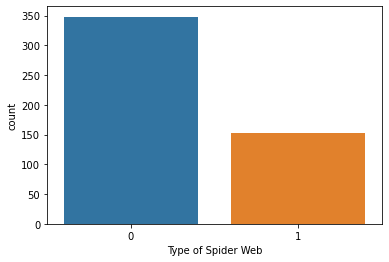

In [6]:
import seaborn as sns
sns.countplot(df_spiderweb['Type of Spider Web'], label='Count')
plt.show()

In [7]:
df_spiderweb.groupby('Type of Spider Web')['Life Span'].count()

Type of Spider Web
0    348
1    152
Name: Life Span, dtype: int64

#### PCC

In [8]:
N = df_spiderweb.shape[0]
n_orb = df_spiderweb.groupby('Type of Spider Web')['Life Span'].count()[1]
n_cob = df_spiderweb.groupby('Type of Spider Web')['Life Span'].count()[0]

PCC = (n_orb/N)**2 + (n_cob/N)**2
print(f'PCC = {PCC * 100 : .2f} %',
      f'\nMinimum Acceptable Prediction Score = {125*PCC: .2f} %')

PCC =  57.68 % 
Minimum Acceptable Prediction Score =  72.10 %


#### Scatter Plot

In [9]:
df_spiderweb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Silk Density              500 non-null    float64
 1   Maximum Breaking Stress   500 non-null    int64  
 2   Spider Mass               500 non-null    int64  
 3   Spider body Length        500 non-null    int64  
 4   Mass perLength            500 non-null    float64
 5   Silk Diameter             500 non-null    float64
 6   Indoor or Outdoor         500 non-null    object 
 7   Color of Spider           500 non-null    object 
 8   Life Span                 500 non-null    float64
 9   Poison level              500 non-null    object 
 10  Humidity of Habitat       500 non-null    int64  
 11  Temperature of Habitat    500 non-null    int64  
 12  Type of Spider Web        500 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 50.9+ KB


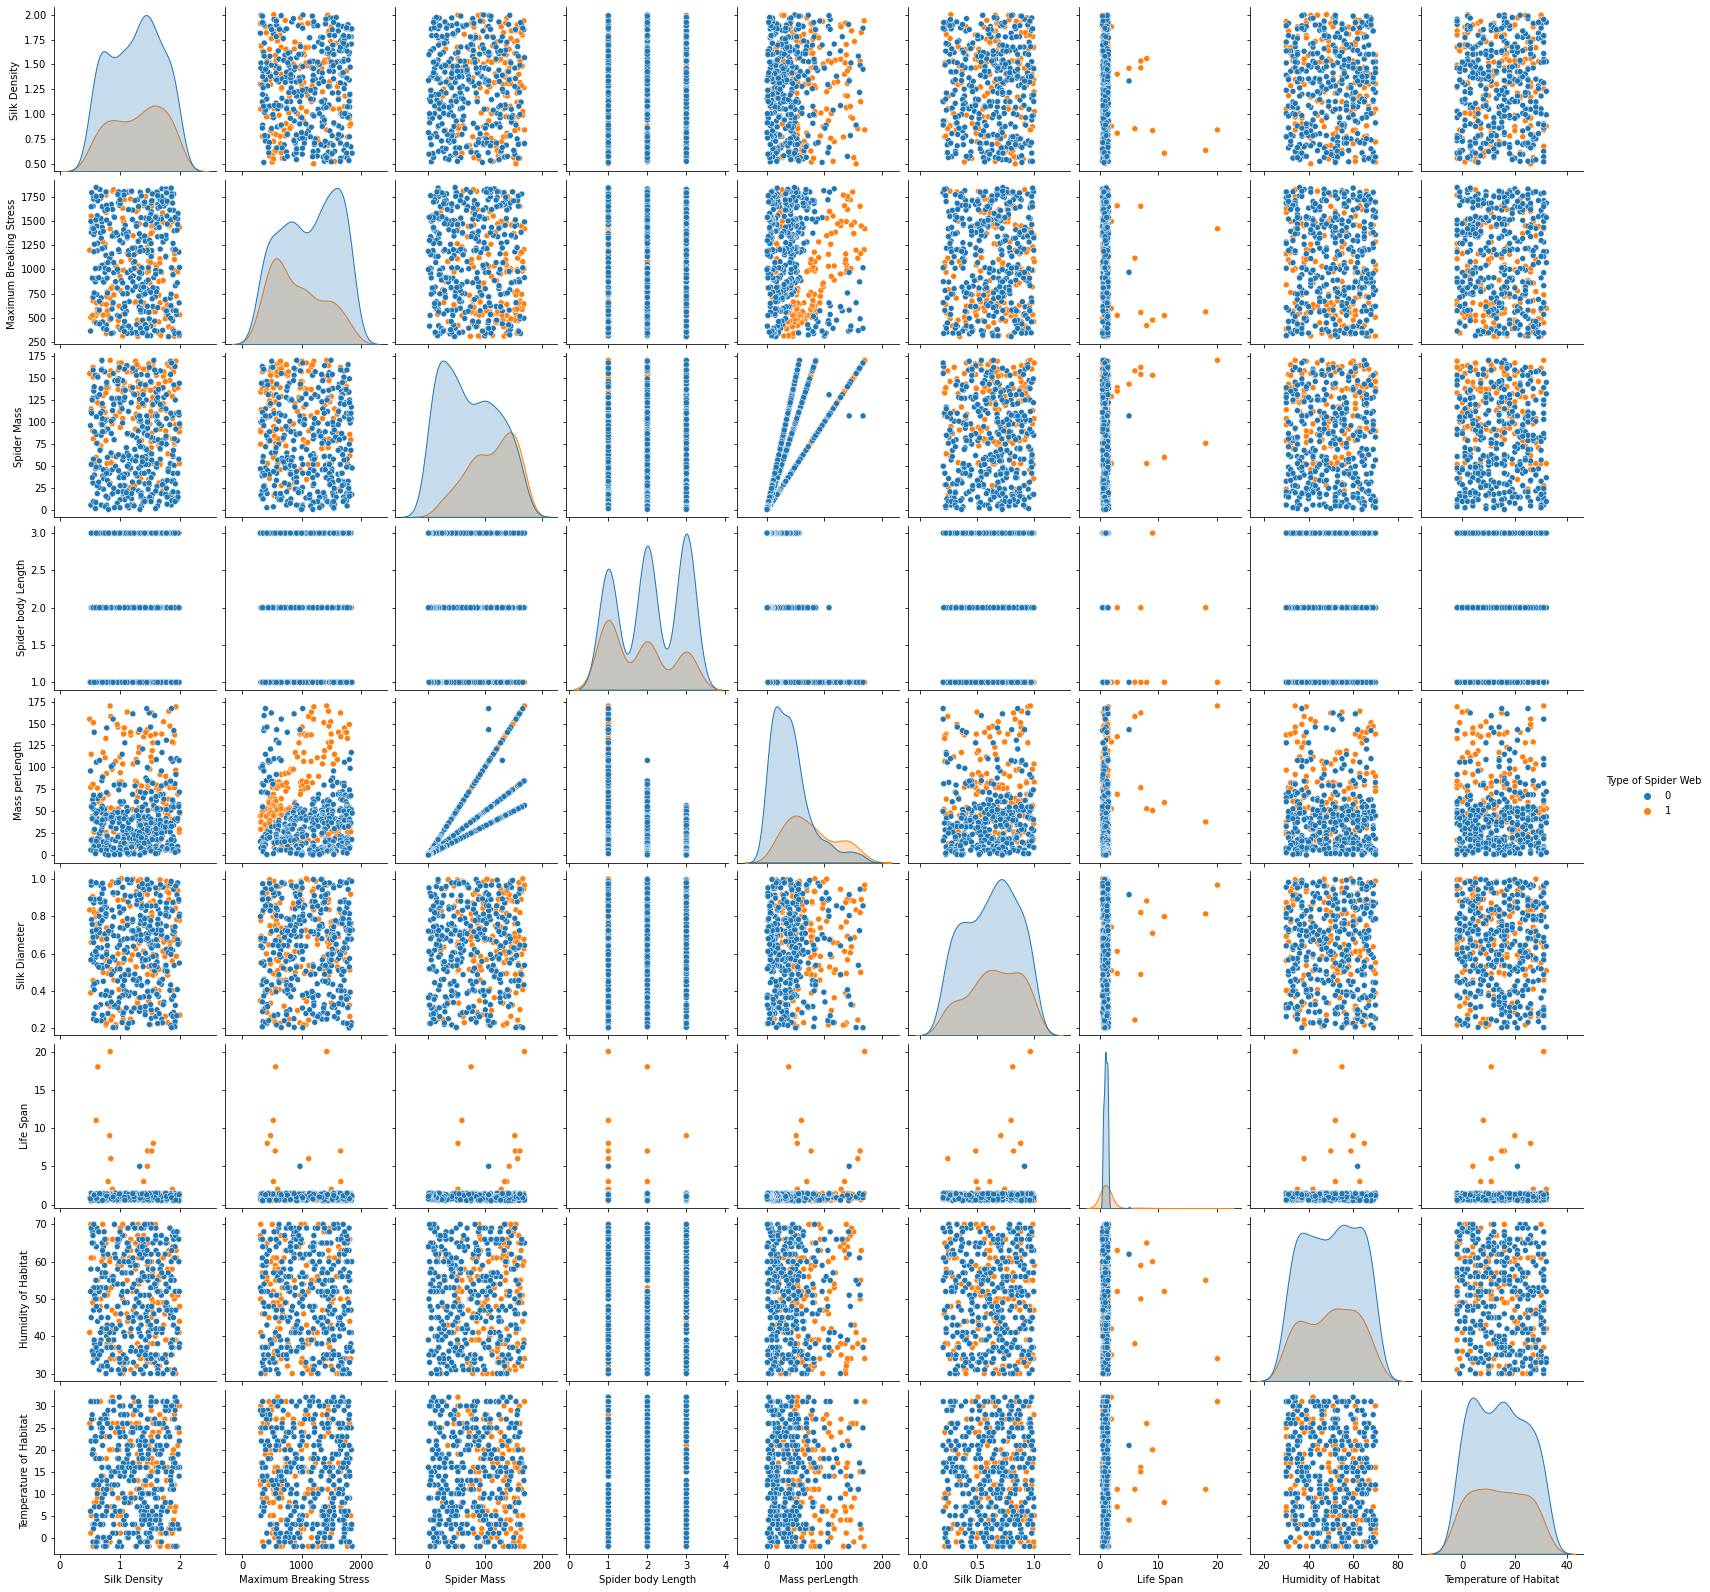

In [10]:
sns.pairplot(df_spiderweb.drop(['Color of Spider', 'Poison level', 'Indoor or Outdoor'], axis=1), hue='Type of Spider Web')
plt.show()

### Preprocessing

In [11]:
df_spiderweb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Silk Density              500 non-null    float64
 1   Maximum Breaking Stress   500 non-null    int64  
 2   Spider Mass               500 non-null    int64  
 3   Spider body Length        500 non-null    int64  
 4   Mass perLength            500 non-null    float64
 5   Silk Diameter             500 non-null    float64
 6   Indoor or Outdoor         500 non-null    object 
 7   Color of Spider           500 non-null    object 
 8   Life Span                 500 non-null    float64
 9   Poison level              500 non-null    object 
 10  Humidity of Habitat       500 non-null    int64  
 11  Temperature of Habitat    500 non-null    int64  
 12  Type of Spider Web        500 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 50.9+ KB


In [12]:
df_spiderweb.head()

,Silk Density,Maximum Breaking Stress,Spider Mass,Spider body Length,Mass perLength,Silk Diameter,Indoor or Outdoor,Color of Spider,Life Span,Poison level,Humidity of Habitat,Temperature of Habitat,Type of Spider Web
0,0.561,1461,81,3,27.0,0.834,outdoor,brown,1.09,moderately poisonous,61,27,1
1,1.995,1437,53,2,26.5,0.659,outdoor,black,0.50,very poisonous,44,30,1
2,1.677,1501,54,2,27.0,0.335,outdoor,gray,1.45,non-poisonous,49,1,1
3,1.161,1622,87,3,29.0,0.763,outdoor,black,0.60,very poisonous,61,22,1
4,1.655,875,31,2,15.5,0.949,outdoor,gray,1.27,non-poisonous,55,-1,1


In [13]:
df_spiderweb['Indoor or Outdoor'].value_counts() #0-1 Mapping

indoor_outdoor_mapping = {
'indoor': 1,
'outdoor': 0
}
df_spiderweb['Indoor or Outdoor'] = df_spiderweb['Indoor or Outdoor'].map(indoor_outdoor_mapping)

In [14]:
display(df_spiderweb['Color of Spider'].value_counts()) #OHE

OHE = pd.get_dummies(df_spiderweb[['Color of Spider']])

df_clean = pd.concat([df_spiderweb, OHE], axis=1).drop(['Color of Spider'], axis=1)
df_clean

brown    177
black    163
gray     160
Name: Color of Spider, dtype: int64

,Silk Density,Maximum Breaking Stress,Spider Mass,Spider body Length,Mass perLength,Silk Diameter,Indoor or Outdoor,Life Span,Poison level,Humidity of Habitat,Temperature of Habitat,Type of Spider Web,Color of Spider_black,Color of Spider_brown,Color of Spider_gray
0,0.561,1461,81,3,27.0,0.834,0,1.09,moderately poisonous,61,27,1,0,1,0
1,1.995,1437,53,2,26.5,0.659,0,0.50,very poisonous,44,30,1,1,0,0
2,1.677,1501,54,2,27.0,0.335,0,1.45,non-poisonous,49,1,1,0,0,1
3,1.161,1622,87,3,29.0,0.763,0,0.60,very poisonous,61,22,1,1,0,0
4,1.655,875,31,2,15.5,0.949,0,1.27,non-poisonous,55,-1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.377,342,55,1,55.0,0.973,0,1.40,moderately poisonous,64,10,0,0,1,0
496,0.996,514,162,2,81.0,0.645,1,1.38,moderately poisonous,34,24,0,0,1,0
497,0.665,435,131,2,108.0,0.892,0,1.43,very poisonous,35,18,0,1,0,0
498,1.451,389,107,1,167.0,0.855,1,1.28,non-poisonous,37,25,0,0,0,1


In [15]:
df_spiderweb['Poison level'].value_counts() #Ordinal mapping
poison_mapping = {
'non-poisonous': 0,
'moderately poisonous': 1,
'very poisonous': 2
}
df_clean['Poison level'] = df_clean['Poison level'].map(poison_mapping)

In [16]:
df_clean

,Silk Density,Maximum Breaking Stress,Spider Mass,Spider body Length,Mass perLength,Silk Diameter,Indoor or Outdoor,Life Span,Poison level,Humidity of Habitat,Temperature of Habitat,Type of Spider Web,Color of Spider_black,Color of Spider_brown,Color of Spider_gray
0,0.561,1461,81,3,27.0,0.834,0,1.09,1,61,27,1,0,1,0
1,1.995,1437,53,2,26.5,0.659,0,0.50,2,44,30,1,1,0,0
2,1.677,1501,54,2,27.0,0.335,0,1.45,0,49,1,1,0,0,1
3,1.161,1622,87,3,29.0,0.763,0,0.60,2,61,22,1,1,0,0
4,1.655,875,31,2,15.5,0.949,0,1.27,0,55,-1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.377,342,55,1,55.0,0.973,0,1.40,1,64,10,0,0,1,0
496,0.996,514,162,2,81.0,0.645,1,1.38,1,34,24,0,0,1,0
497,0.665,435,131,2,108.0,0.892,0,1.43,2,35,18,0,1,0,0
498,1.451,389,107,1,167.0,0.855,1,1.28,0,37,25,0,0,0,1


#### Scaling and Train Test Split

This part is done in the ML models. The code below is how the data is scaled in the ML models

In [17]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# MM_scaler = MinMaxScaler()

# X_train_full, X_test, y_train_full, y_test = train_test_split(X,
#                                                               y,
#                                                               test_size=0.2,
#                                                               random_state=1337)

# # scale the X_train_full and X_test
# X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

# X_test_scaled = MM_scaler.transform(X_test.astype(float))



Define features and the target variables

In [18]:
X = df_clean.drop(['Type of Spider Web'], axis=1)
y = df_clean.loc[:, 'Type of Spider Web']

### ML Classifier Models

Required models
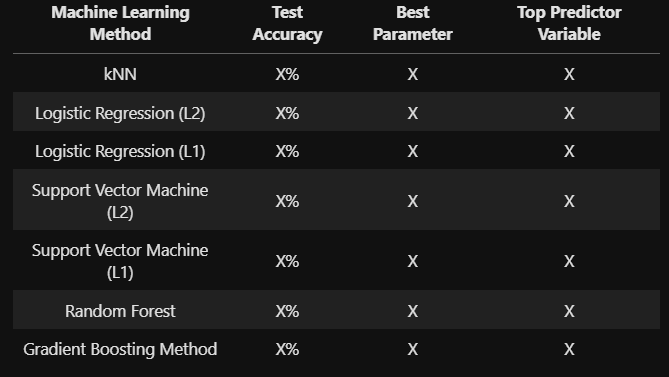

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
n_trials = 10

In [21]:
def clf_knn(X, y, max_k):
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.neighbors import KNeighborsClassifier
    start_time = time.time()
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
    parameters = {'n_neighbors': list(range(1,max_k+1))}

    GS = GridSearchCV(
        KNeighborsClassifier(), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    
    # plotting error bars
    plt.errorbar(parameters['n_neighbors'], GS.cv_results_['mean_train_score'],
             yerr=GS.cv_results_['std_train_score'], label="training accuracy",
                 color='#004369')
    plt.errorbar(parameters['n_neighbors'],  GS.cv_results_['mean_test_score'],
                 yerr=GS.cv_results_['std_test_score']/6, label="test accuracy",
                 color='#FFA500')
#     plt.text((best_k+1/max_k+1), 0.5, f'n_neighbor = {best_k+1}', size=28)
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.axvline(best_k+1, color='#DB1F48', ls='--', lw=0.6)
    plt.legend()
    plt.show()
    
    test_score_list = []
    for seed in range(n_trials):
        
        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))


        
        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)
    test_score_means = np.mean(test_score_list)
    
    
    
    best_params = GS.best_params_
    print(f'best params = {best_params}')

    print(f'best model = {best_model}')
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return (
        ['Knn',
        'n_neighbor',
        best_k+1,
        GS.cv_results_['mean_test_score'][best_k],
        GS.best_score_,
        test_score_means,
        'NA',
        runtime
        ]
    )

def train_svc(X, y, mode):
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.svm import LinearSVC
    start_time = time.time()
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
        
    
    C_list = np.logspace(-3,3,10)
    if mode == 'l1':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      'loss': ['squared_hinge'],
                      'dual' : [False]}
    elif mode == 'l2':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      }

    
    GS = GridSearchCV(
        LinearSVC(max_iter=1_000_000), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_c_idx = GS.cv_results_['mean_test_score'].argmax()
    best_c = GS.best_params_['C']
    best_val_acc = GS.cv_results_['mean_test_score'][best_c_idx]
    best_train_acc = GS.cv_results_['mean_train_score'][best_c_idx]

    # plotting error bars
    plt.errorbar(C_list, GS.cv_results_['mean_train_score'],
             yerr=GS.cv_results_['std_train_score'], label="training accuracy",
                 color='#004369')
    plt.errorbar(C_list,  GS.cv_results_['mean_test_score'],
                 yerr=GS.cv_results_['std_test_score']/6, label="test accuracy",
                 color='#FFA500')
    #     plt.text((best_k+1/max_k+1), 0.5, f'n_neighbor = {best_k+1}', size=28)
    plt.ylabel("Accuracy")
    plt.xscale('log')
    plt.xlabel("C")
    plt.axvline(C_list[best_c_idx], color='#DB1F48', ls='--', lw=0.6)
    plt.legend()
    plt.show()

    # testing test set using optimal model
    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)

        coefs = best_model.coef_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)[0]
    coefs_mean

    # plotting top predictors
    # len(coefs_mean)
    
    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

    ax.set_yticks(np.arange(len(coefs_mean)))
    ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
    plt.show()

    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return [f'SVC Regression ({mode})', 'C', best_c, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

def train_logistic(X, y, mode):
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LogisticRegression
    start_time = time.time()
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
        
    
    C_list = np.logspace(-3,3,10)
    
    if mode == 'l1':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      'solver': ['liblinear']}
    if mode == 'l2':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      'dual': [False]}

    
    GS = GridSearchCV(
        LogisticRegression(max_iter=1_000_000), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_c_idx = GS.cv_results_['mean_test_score'].argmax()
    best_c = GS.best_params_['C']
    best_val_acc = GS.cv_results_['mean_test_score'][best_c_idx]
    best_train_acc = GS.cv_results_['mean_train_score'][best_c_idx]

    # plotting error bars
    plt.errorbar(C_list, GS.cv_results_['mean_train_score'],
             yerr=GS.cv_results_['std_train_score'], label="training accuracy",
                 color='#004369')
    plt.errorbar(C_list,  GS.cv_results_['mean_test_score'],
                 yerr=GS.cv_results_['std_test_score']/6, label="test accuracy",
                 color='#FFA500')
    #     plt.text((best_k+1/max_k+1), 0.5, f'n_neighbor = {best_k+1}', size=28)
    plt.ylabel("Accuracy")
    plt.xscale('log')
    plt.xlabel("C")
    plt.axvline(C_list[best_c_idx], color='#DB1F48', ls='--', lw=0.6)
    plt.legend()
    plt.show()

    # testing test set using optimal model
    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)

        coefs = best_model.coef_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)[0]
    coefs_mean

    # plotting top predictors
    # len(coefs_mean)
#     display(X.columns)
    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

    ax.set_yticks(np.arange(len(coefs_mean)))
    ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
    plt.show()

    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return [f'Logistic Regression ({mode})', 'C', best_c, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

In [22]:
# PLEASE REMOVE SCALING
def RF_clf(X,y):
    import time
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
    start_time = time.time()
    max_depth_list = list(np.arange(1,6))
    parameters = {'max_depth': max_depth_list,
                  'criterion': ['gini', 'entropy'],
                  'n_estimators': [100],
                 'max_features': [0.1, .2, .3, .4, .5, .7]}


    GS = GridSearchCV(
        RandomForestClassifier(), parameters, cv=8, return_train_score=True
    )

#     GS.fit(X_train_full_scaled, y_train_full)
    GS.fit(X_train_full, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_params = GS.best_params_
    best_val_acc = np.amax(GS.cv_results_['mean_test_score'])
    best_train_acc = GS.cv_results_['mean_train_score'][np.argmax(GS.cv_results_['mean_test_score'])]

#     GS.best_score_, best_val_acc ###

    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full, y_train_full) ############
        test_score = best_model.score(X_test, y_test) ######
        test_score_list.append(test_score)

        coefs = best_model.feature_importances_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)
    # display(coefs_mean)

    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

    ax.set_yticks(np.arange(len(coefs_mean)))
    ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
    plt.show()
    top_pred = ''
    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return ['Random Forest CLF', 'criterion, max_depth, max_features, n_estimators',
    best_params, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

In [23]:
# PLEASE REMOVE SCALING
def GBM_clf(X,y):
    import time
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
    start_time = time.time()
    max_depth_list = list(np.arange(1,6))
    parameters = {'max_depth': max_depth_list,
                  'n_estimators': [100],
                  'max_features': [0.1, .2, .3, .4, .5, .7],
                  'learning_rate': np.arange(0.01, 0.1, 0.02)}


    GS = GridSearchCV(
        GradientBoostingClassifier(), parameters, cv=8, return_train_score=True
    )

#     GS.fit(X_train_full_scaled, y_train_full)
    GS.fit(X_train_full, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_params = GS.best_params_
    best_val_acc = np.amax(GS.cv_results_['mean_test_score'])
    best_train_acc = GS.cv_results_['mean_train_score'][np.argmax(GS.cv_results_['mean_test_score'])]

#     GS.best_score_, best_val_acc ###

    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full, y_train_full) #########
        test_score = best_model.score(X_test, y_test) ###########
        test_score_list.append(test_score)

        coefs = best_model.feature_importances_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)
    # display(coefs_mean)

    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

    ax.set_yticks(np.arange(len(coefs_mean)))
    ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
    plt.show()
    top_pred = ''
    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return ['GBM CLF', 'learning_rate, max_depth, max_features, n_estimators',
    best_params, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

KNeighborsClassifier(n_neighbors=7)


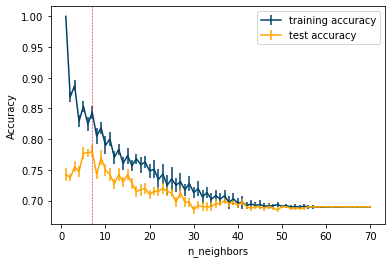

best params = {'n_neighbors': 7}
best model = KNeighborsClassifier(n_neighbors=7)
LogisticRegression(C=46.41588833612773, max_iter=1000000)


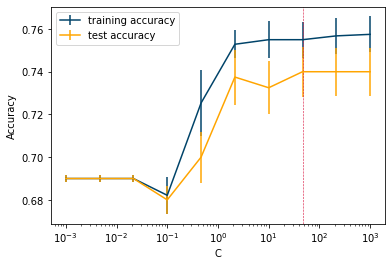

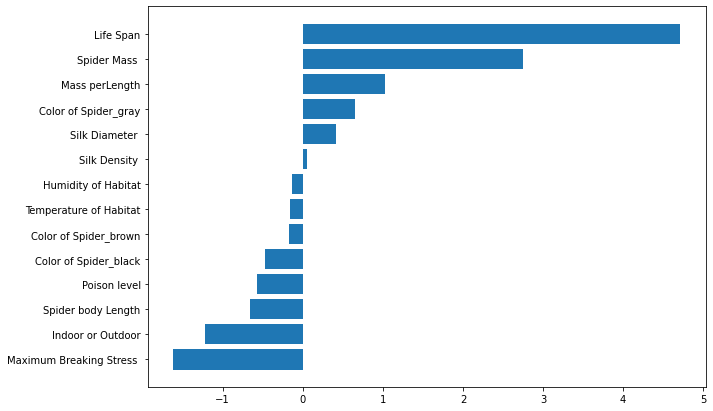

LogisticRegression(C=46.41588833612773, max_iter=1000000, penalty='l1',
                   solver='liblinear')


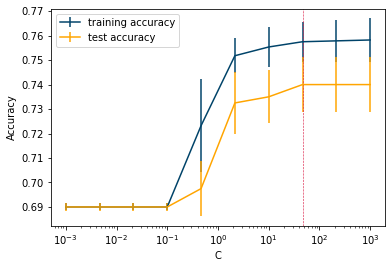

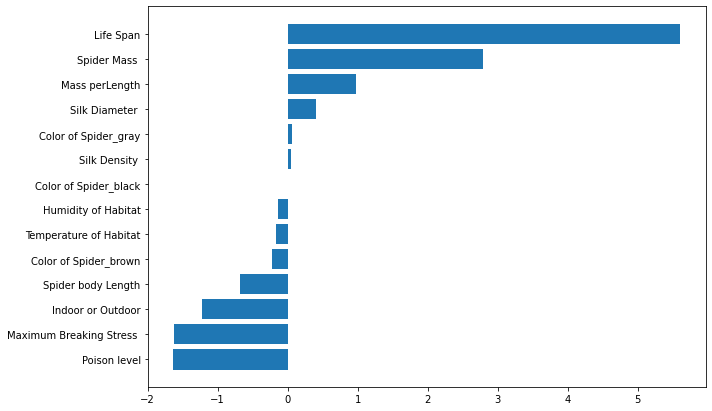

LinearSVC(C=0.46415888336127775, max_iter=1000000)


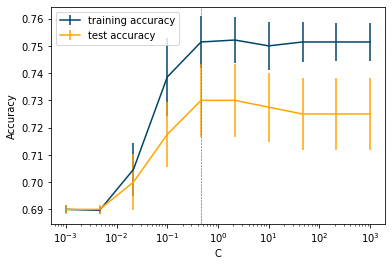

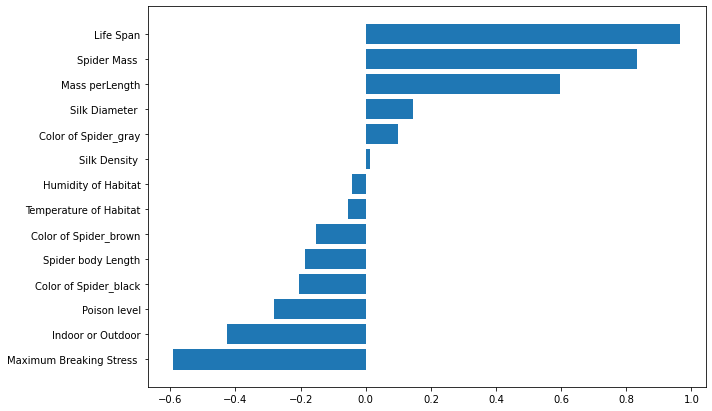

LinearSVC(C=2.154434690031882, dual=False, max_iter=1000000, penalty='l1')


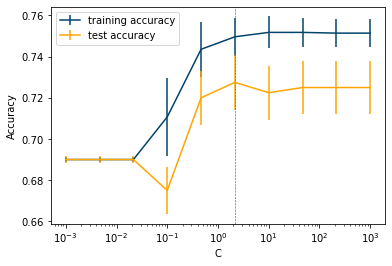

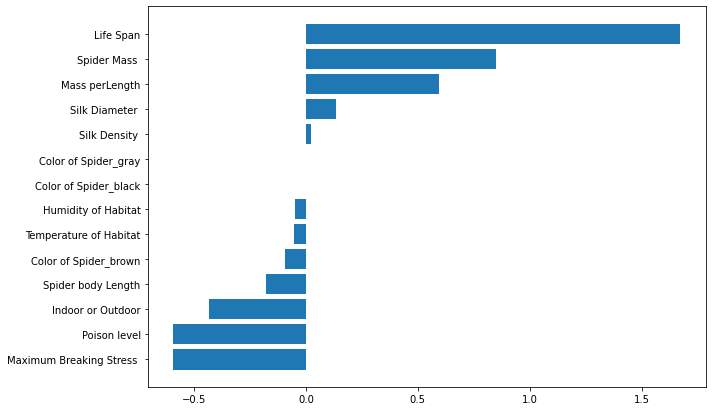

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=0.7)


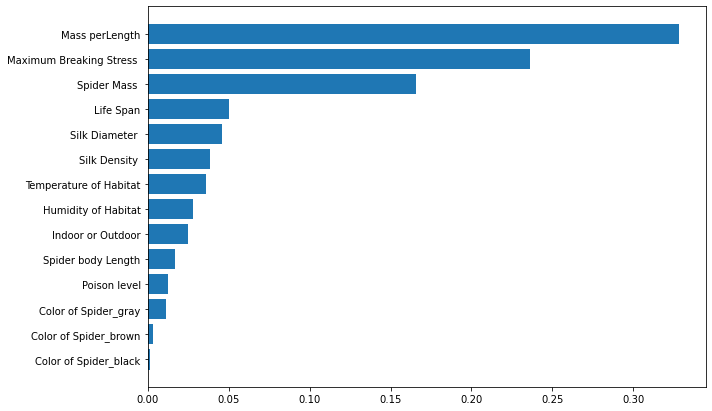

GradientBoostingClassifier(learning_rate=0.03, max_depth=5, max_features=0.7)


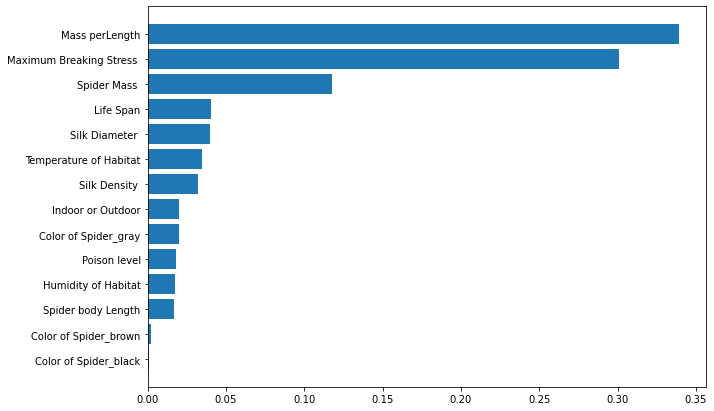

----end----


In [24]:
res_knn = clf_knn(X, y, 70)

res_logi_l2 = train_logistic(X,y, 'l2')
res_logi_l1 = train_logistic(X,y, 'l1')

res_svc_l2 = train_svc(X, y, 'l2')
res_svc_l1 = train_svc(X, y, 'l1')

res_RF = RF_clf(X,y)
res_GBM = GBM_clf(X,y)

print('----end----')



### Summary

In [25]:
models_list = [res_knn, res_logi_l2, res_logi_l1,
               res_svc_l2, res_svc_l1, res_RF, res_GBM]
col_summary = ['ML Model', 
           'Hyperparameter', 
           'Best Parameters', 
           'Best Train Accuracy', 
           'Best Validation Accuracy', 
           'Best Test Accuracy', 
           'Top Predictor', 
           'Run Time']
df_summary = pd.DataFrame(columns=col_summary)

for i, model in enumerate(models_list):
    df_summary.loc[i] = model
df_summary.loc[:, 'Best Parameters'] = df_summary['Best Parameters'].apply(lambda x: x.values() if type(x)==dict else x)
df_summary['Best Test Accuracy'] = df_summary['Best Test Accuracy'].apply(lambda x: (str((x*100)))[:5] + ' %')

df_summary[['ML Model', 'Hyperparameter', 'Best Parameters', 'Best Test Accuracy', 'Top Predictor']]

,ML Model,Hyperparameter,Best Parameters,Best Test Accuracy,Top Predictor
0,Knn,n_neighbor,7,77.4 %,NA
1,Logistic Regression (l2),C,46.415888,73.00 %,Life Span
2,Logistic Regression (l1),C,46.415888,72.7 %,Life Span
3,SVC Regression (l2),C,0.464159,73.4 %,Life Span
4,SVC Regression (l1),C,2.154435,73.3 %,Life Span
5,Random Forest CLF,"criterion, max_depth, max_features, n_estimators","(entropy, 5, 0.7, 100)",86.7 %,Mass perLength
6,GBM CLF,"learning_rate, max_depth, max_features, n_esti...","(0.03, 5, 0.7, 100)",88.4 %,Mass perLength
